# Initializing the Graph

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power

# import warnings
# warnings.filterwarnings("ignore", category=UserWarning)

Graph Info:
Name: G
Type: Graph
Number of nodes: 6
Number of edges: 7
Average degree:   2.3333

Graph Nodes: [(0, {'name': 0}), (1, {'name': 1}), (2, {'name': 2}), (3, {'name': 3}), (4, {'name': 4}), (5, {'name': 5})]


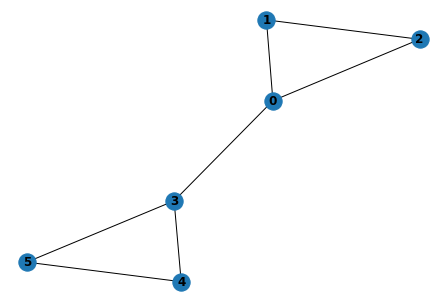

In [3]:
G = nx.Graph(name='G')

for i in range(6):
    G.add_node(i, name=i)

edges = [(0, 1), (0, 2), (1, 2), (0, 3), (3, 4), (3, 5), (4, 5)]
G.add_edges_from(edges)

print('Graph Info:\n{0}'.format(nx.info(G)))

print('\nGraph Nodes: {0}'.format(G.nodes.data()))

nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

# Adjacency Matrix

In [15]:
# Method attr_matrix()
nx.attr_matrix(G, node_attr='name')

(matrix([[0., 1., 1., 1., 0., 0.],
         [1., 0., 1., 0., 0., 0.],
         [1., 1., 0., 0., 0., 0.],
         [1., 0., 0., 0., 1., 1.],
         [0., 0., 0., 1., 0., 1.],
         [0., 0., 0., 1., 1., 0.]]),
 [0, 1, 2, 3, 4, 5])

In [16]:
# Adjacency Matrix (A) and Node Features Matrix (X) as numpy array
A = np.array(nx.attr_matrix(G, node_attr='name')[0])
X = np.array(nx.attr_matrix(G, node_attr='name')[1])
X = np.expand_dims(X,axis=1)

print('Shape of A: {0}'.format(A.shape))
print('\nShape of X: {0}'.format(X.shape))
print('\nAdjacency Matrix (A):\n{0}'.format(A))
print('\nNode Features Matrix (X):\n{0}'.format(X))

Shape of A: (6, 6)

Shape of X: (6, 1)

Adjacency Matrix (A):
[[0. 1. 1. 1. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 1. 0.]]

Node Features Matrix (X):
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]


Скалярное произведение A и X

In [18]:
AX = np.dot(A,X)
print('ot product of A and X (AX):\n{0}'.format(AX))

ot product of A and X (AX):
[[6.]
 [2.]
 [1.]
 [9.]
 [8.]
 [7.]]


Дот продукт - это сумма по соседним узлам. Не учитывает сам узел.

Как предлагается решить эту проблему? А просто добавить петли для каждой ноды. Таким образом каждая нода начнет ссылаться сама на себя

In [19]:
G_self_loops = G.copy()

self_loops = []
for i in range(G.number_of_nodes()):
    self_loops.append((i,i))

G_self_loops.add_edges_from(self_loops)

# Check the edges of G_self_loops after adding the self loops
print('Edges of G with self-loops:\n{0}'.format(G_self_loops.edges))

# Adjacency Matrix (A) and Node Features Matrix (X) of self-lopps graph
A_hat = np.array(nx.attr_matrix(G_self_loops, node_attr='name')[0])
print('Adjacency Matrix of added self-loops G (A_hat):\n{0}'.format(A_hat))

# dot product
AX = np.dot(A_hat, X)
print('AX:\n{0}'.format(AX))

Edges of G with self-loops:
[(0, 1), (0, 2), (0, 3), (0, 0), (1, 2), (1, 1), (2, 2), (3, 4), (3, 5), (3, 3), (4, 5), (4, 4), (5, 5)]
Adjacency Matrix of added self-loops G (A_hat):
[[1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]]
AX:
[[ 6.]
 [ 3.]
 [ 3.]
 [12.]
 [12.]
 [12.]]


**Надо нормализовать данные**

Для GCNN вычисляется матрица степеней (D) и выполняется операция скалярного произведения онвертированной D с AX (DAX). «Степень» относится к количеству ребер, с которыми связан узел.

![](img/034.png)

In [20]:
# Degree Matrix of the self-loops graph
Deg_Mat = G_self_loops.degree()
print('Degree Matrix of added self-loops G (D): {0}'.format(Deg_Mat))

# Convert the Degree Matrix to a N x N matrix where N is the number of nodes
D = np.diag([deg for (n,deg) in list(Deg_Mat)])
print('Degree Matrix of added self-loops G as numpy array (D):\n{0}'.format(D))

# Inverse of Degree Matrix (D)
D_inv = np.linalg.inv(D)
print('Inverse of D:\n{0}'.format(D_inv))

#Dot product of D and AX for normalization
DAX = np.dot(D_inv,AX)
print('DAX:\n{0}'.format(DAX))

Degree Matrix of added self-loops G (D): [(0, 5), (1, 4), (2, 4), (3, 5), (4, 4), (5, 4)]
Degree Matrix of added self-loops G as numpy array (D):
[[5 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 4 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 4 0]
 [0 0 0 0 0 4]]
Inverse of D:
[[0.2  0.   0.   0.   0.   0.  ]
 [0.   0.25 0.   0.   0.   0.  ]
 [0.   0.   0.25 0.   0.   0.  ]
 [0.   0.   0.   0.2  0.   0.  ]
 [0.   0.   0.   0.   0.25 0.  ]
 [0.   0.   0.   0.   0.   0.25]]
DAX:
[[1.2 ]
 [0.75]
 [0.75]
 [2.4 ]
 [3.  ]
 [3.  ]]


При сравнении DAX и AX обнаруживается это:
![](img/032.png)

После нормализации значение на узле 3 изменилось. Это происходит из-за того, что у узда 3 больше ребер, чем у узлов 4 и 5. В результате у узла 3 выше степень и ниже вес в DAX. Порлучается, что чем ниже степень у узла, тем ближе он к какому-то кластеру узлов.

Решение проблемы: [symmetric normalization](https://arxiv.org/pdf/1609.02907.pdf) - я прочитл по диагонали, там эта штука называется трюком перенормировки.

![](img/033.png)

In [21]:
# Symmetrically-normalization
D_half_norm = fractional_matrix_power(D, -0.5)
DADX = D_half_norm.dot(A_hat).dot(D_half_norm).dot(X)
print('DADX:\n{0}'.format(DADX))

DADX:
[[1.27082039]
 [0.75      ]
 [0.75      ]
 [2.61246118]
 [2.92082039]
 [2.92082039]]


# Weights and Activation Function

Дальше просто: строится двухслойная сеть с прямым распространением. Четыре нейрона в первом слое. Два нейрона на выходе (два измеренеия). Relu

In [22]:
# Initialize the weights
np.random.seed(77777)
n_h = 4 #number of neurons in the hidden layer
n_y = 2 #number of neurons in the output layer
W0 = np.random.randn(X.shape[1],n_h) * 0.01
W1 = np.random.randn(n_h,n_y) * 0.01

#I ReLu as activation function
def relu(x):
    return np.maximum(0, x)

# GCN layer
def gcn(A, H, W):
    I = np.identity(A.shape[0]) # create Identity Matrix of A
    A_hat = A + I # add self-loop to A
    D = np.diag(np.sum(A_hat, axis=0)) # create Degree Matrix of A
    D_half_norm = fractional_matrix_power(D, -0.5) # calculate D to the power of -0.5 (трюк с нормализацией)
    eq = D_half_norm.dot(A_hat).dot(D_half_norm).dot(H).dot(W)
    return relu(eq)

# Do forward propagation
H1 = gcn(A, X, W0)
H2 = gcn(A, H1, W1)
print('Features Representation from GCN output:\n{0}'.format(H2))

Features Representation from GCN output:
[[0.00027758 0.        ]
 [0.00017298 0.        ]
 [0.00017298 0.        ]
 [0.00053017 0.        ]
 [0.00054097 0.        ]
 [0.00054097 0.        ]]


# Plotting the Features Representations

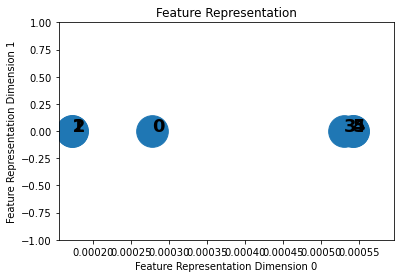

In [8]:
def plot_features(H2):
    #Plot the features representation
    x = H2[:,0]
    y = H2[:,1]

    size = 1000

    plt.scatter(x,y,size)
    plt.xlim([np.min(x)*0.9, np.max(x)*1.1])
    plt.ylim([-1, 1])
    plt.xlabel('Feature Representation Dimension 0')
    plt.ylabel('Feature Representation Dimension 1')
    plt.title('Feature Representation')

    for i,row in enumerate(H2):
        str = "{}".format(i)
        plt.annotate(str, (row[0],row[1]),fontsize=18, fontweight='bold')

    plt.show()


plot_features(H2)

[источник](https://towardsdatascience.com/understanding-graph-convolutional-networks-for-node-classification-a2bfdb7aba7b)

Graph Info:
Name: G1
Type: Graph
Number of nodes: 10
Number of edges: 12
Average degree:   2.4000

Graph Nodes: [(0, {'name': 0}), (1, {'name': 1}), (2, {'name': 2}), (3, {'name': 3}), (4, {'name': 4}), (5, {'name': 5}), (6, {'name': 6}), (7, {'name': 7}), (8, {'name': 8}), (9, {'name': 9})]


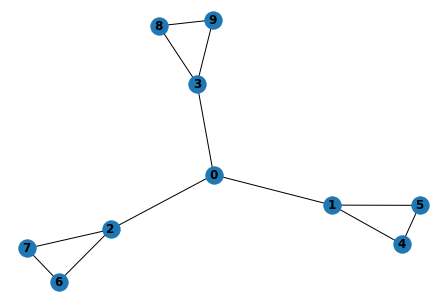

In [25]:
G1 = nx.Graph(name='G1')

for i in range(10):
    G1.add_node(i, name=i)

edges1 = [(0, 1), (0, 2), (0, 3), (1, 4), (1, 5), (4, 5), (2, 6), (2, 7), (6, 7), (3, 8), (3, 9), (8, 9)]
G1.add_edges_from(edges1)

print('Graph Info:\n{0}'.format(nx.info(G1)))

print('\nGraph Nodes: {0}'.format(G1.nodes.data()))

nx.draw(G1, with_labels=True, font_weight='bold')
plt.show()

In [27]:
A1 = np.array(nx.attr_matrix(G1, node_attr='name')[0])
X1 = np.array(nx.attr_matrix(G1, node_attr='name')[1])
X1 = np.expand_dims(X1, axis=1)

print('Shape of A1: {0}'.format(A1.shape))
print('\nShape of X1: {0}'.format(X1.shape))
print('\nAdjacency Matrix (A1):\n{0}'.format(A1))
print('\nNode Features Matrix (X1):\n{0}'.format(X1))

Shape of A1: (10, 10)

Shape of X1: (10, 1)

Adjacency Matrix (A1):
[[0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]]

Node Features Matrix (X1):
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [36]:
n_h = 6
n_y = 2
W0 = np.random.randn(X1.shape[1], n_h) * 0.01
W1 = np.random.randn(n_h, n_y) * 0.01

In [37]:
H1 = gcn(A1, X1, W0)
H2 = gcn(A1, H1, W1)
print('Features Representation from GCN output:\n{0}'.format(H2))

Features Representation from GCN output:
[[1.14800537e-04 1.17382509e-04]
 [9.61582879e-05 9.83209785e-05]
 [1.37627944e-04 1.40723326e-04]
 [1.79097599e-04 1.83125673e-04]
 [9.70884695e-05 9.92720807e-05]
 [9.70884695e-05 9.92720807e-05]
 [1.44973503e-04 1.48234094e-04]
 [1.44973503e-04 1.48234094e-04]
 [1.92858537e-04 1.97196107e-04]
 [1.92858537e-04 1.97196107e-04]]


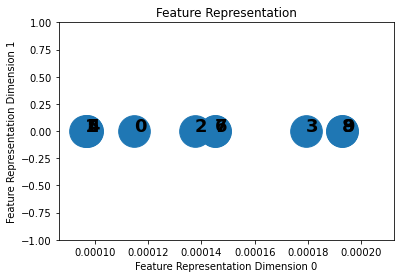

In [39]:
def plot_features(H2):
    #Plot the features representation
    x = H2[:,0]
    y = H2[:,1]

    size = 1000

    plt.scatter(x,y,size)
    plt.xlim([np.min(x)*0.9, np.max(x)*1.1])
    plt.ylim([-1, 1])
    plt.xlabel('Feature Representation Dimension 0')
    plt.ylabel('Feature Representation Dimension 1')
    plt.title('Feature Representation')

    for i,row in enumerate(H2):
        str = "{}".format(i)
        plt.annotate(str, (row[0],row[1]),fontsize=18, fontweight='bold')

    plt.show()


plot_features(H2)